In [4]:
!pip install pandas
!pip install yfinance
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------------------


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 41.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 33.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 64.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 47.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
def scrape_quarterly_revenue_macrotrends(ticker: str, company_slug: str) -> pd.DataFrame:
    """
    Scrape quarterly revenue from Macrotrends.
    Returns a DataFrame with ['Date','Revenue'].
    """
    url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{company_slug}/revenue"
    tables = pd.read_html(url)
    revenue_df = None

    for df in tables:
        if df.shape[1] >= 2:
            c0, c1 = str(df.columns[0]).lower(), str(df.columns[1]).lower()
            if ("date" in c0 or "quarter" in c0) and "revenue" in c1:
                df = df.iloc[:, :2].copy()
                df.columns = ["Date", "Revenue"]
                revenue_df = df
                break

    revenue_df = revenue_df.dropna(subset=["Revenue"]).copy()
    revenue_df["Revenue"] = (revenue_df["Revenue"].astype(str)
                              .str.replace("$", "", regex=False)
                              .str.replace(",", "", regex=False)
                              .str.strip())
    revenue_df = revenue_df[revenue_df["Revenue"] != ""]
    revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors="coerce")
    revenue_df = revenue_df.dropna(subset=["Revenue"]).copy()
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"], errors="coerce")
    revenue_df = revenue_df.dropna(subset=["Date"]).copy()
    revenue_df = revenue_df.sort_values("Date").reset_index(drop=True)

    return revenue_df

In [7]:
def plot_stock_and_revenue(stock_df: pd.DataFrame, revenue_df: pd.DataFrame, stock_label: str):
    fig = plt.figure(figsize=(12,4))

    # Stock Closing Price
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(stock_df.index, stock_df['Close'])
    ax1.set_title(f"{stock_label} Closing Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Close Price")

    # Revenue
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(revenue_df['Date'], revenue_df['Revenue'])
    ax2.set_title(f"{stock_label} Quarterly Revenue")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Revenue (USD)")

    plt.tight_layout()
    plt.show()

In [8]:
tsla = yf.Ticker("TSLA")
tesla_stock = tsla.history(period="max")

print("Tesla stock data shape:", tesla_stock.shape)
tesla_stock.head()

Tesla stock data shape: (3828, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
!pip install lxml html5lib beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 34.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import lxml
import bs4
import html5lib
import requests
print("All optional dependencies are installed!")

All optional dependencies are installed!


In [ ]:
from io import StringIO
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/124.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}
resp = requests.get(url, headers=headers, timeout=20)
resp.raise_for_status()
tables = pd.read_html(StringIO(resp.text))
revenue_df = None
for df in tables:
    if df.shape[1] >= 2:
        c0, c1 = str(df.columns[0]).lower(), str(df.columns[1]).lower()
        if ("date" in c0 or "quarter" in c0) and "revenue" in c1:
            df = df.iloc[:, :2].copy()
            df.columns = ["Date", "Revenue"]
            revenue_df = df
            break
if revenue_df is None:
    raise ValueError("Revenue table not found. Page structure may have changed.")
revenue_df = revenue_df.dropna(subset=["Revenue"]).copy()
revenue_df["Revenue"] = (revenue_df["Revenue"].astype(str)
                         .replace({"\\$": "", ",": ""}, regex=True)
                         .str.strip())
revenue_df = revenue_df[revenue_df["Revenue"] != ""]
revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors="coerce")
revenue_df = revenue_df.dropna(subset=["Revenue"]).copy()
revenue_df["Date"] = pd.to_datetime(revenue_df["Date"], errors="coerce")
revenue_df = revenue_df.dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)

revenue_df.head()

,Date,Revenue
0,2009-06-30,27
1,2009-09-30,46
2,2010-03-31,21
3,2010-06-30,28
4,2010-09-30,31


In [21]:
gme = yf.Ticker("GME")
gamestop_stock = gme.history(period="max")

print("GameStop stock data shape:", gamestop_stock.shape)
gamestop_stock.head()

GameStop stock data shape: (5936, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [23]:
from io import StringIO

def scrape_quarterly_revenue_macrotrends(ticker: str, company_slug: str) -> pd.DataFrame:
    """
    Scrape quarterly revenue from Macrotrends and return a clean DataFrame with ['Date','Revenue'].
    """
    url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{company_slug}/revenue"
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                       "AppleWebKit/537.36 (KHTML, like Gecko) "
                       "Chrome/124.0.0.0 Safari/537.36"),
        "Accept-Language": "en-US,en;q=0.9",
    }

    # Fetch HTML with browser-like headers to avoid 403
    resp = requests.get(url, headers=headers, timeout=20)
    resp.raise_for_status()

    # Parse the HTML text (not the URL) to avoid another 403 inside pandas
    tables = pd.read_html(StringIO(resp.text))

    # Find the revenue table robustly
    revenue_df = None
    for df in tables:
        if df.shape[1] >= 2:
            c0, c1 = str(df.columns[0]).lower(), str(df.columns[1]).lower()
            if ("date" in c0 or "quarter" in c0) and "revenue" in c1:
                df = df.iloc[:, :2].copy()
                df.columns = ["Date", "Revenue"]
                revenue_df = df
                break

    if revenue_df is None:
        raise ValueError("Could not locate a revenue table on Macrotrends. The page structure may have changed.")

    # Clean values
    revenue_df = revenue_df.dropna(subset=["Revenue"]).copy()
    revenue_df["Revenue"] = (revenue_df["Revenue"].astype(str)
                             .replace({r"\$": "", ",": ""}, regex=True)
                             .str.strip())
    revenue_df = revenue_df[revenue_df["Revenue"] != ""]
    revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors="coerce")
    revenue_df = revenue_df.dropna(subset=["Revenue"]).copy()

    # Dates
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"], errors="coerce")
    revenue_df = revenue_df.dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)

    return revenue_df

In [24]:
gamestop_revenue = scrape_quarterly_revenue_macrotrends("GME", "gamestop")
print("GameStop revenue shape:", gamestop_revenue.shape)
gamestop_revenue.head()

GameStop revenue shape: (66, 2)


,Date,Revenue
0,2009-01-31,3492
1,2009-04-30,1981
2,2009-07-31,1739
3,2009-10-31,1835
4,2010-01-31,3524


In [31]:
!pip install lxml html5lib beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip install html5lib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from io import StringIO
import pandas as pd
import requests

def scrape_revenue_macrotrends(ticker, company_slug):
    url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{company_slug}/revenue"
    headers = {"User-Agent": "Mozilla/5.0"}
    resp = requests.get(url, headers=headers)
    resp.raise_for_status()

    # Use lxml parser instead of bs4/html5lib
    tables = pd.read_html(StringIO(resp.text), match="Revenue", flavor="lxml")

    # Pick the right table
    for df in tables:
        if "Revenue" in df.columns[1]:
            revenue_df = df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Revenue"})
            revenue_df = revenue_df.dropna()
            revenue_df["Revenue"] = (
                revenue_df["Revenue"].astype(str)
                .replace({r"\$": "", ",": ""}, regex=True)
            )
            revenue_df = revenue_df[revenue_df["Revenue"] != ""]
            revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors="coerce")
            return revenue_df.reset_index(drop=True)

    return None


In [37]:
tesla_revenue = scrape_revenue_macrotrends("TSLA", "tesla")
print(tesla_revenue.head())


   Date  Revenue
0  2024    97690
1  2023    96773
2  2022    81462
3  2021    53823
4  2020    31536


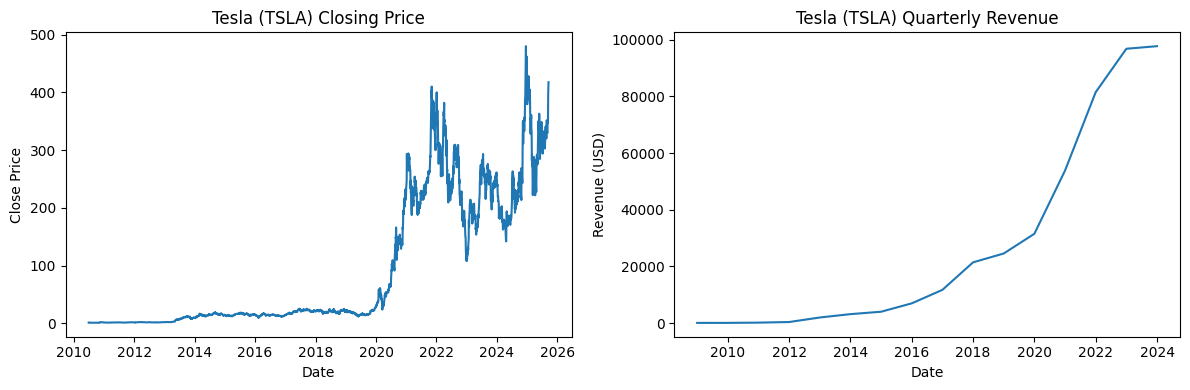

In [38]:
plot_stock_and_revenue(tesla_stock, tesla_revenue, "Tesla (TSLA)")

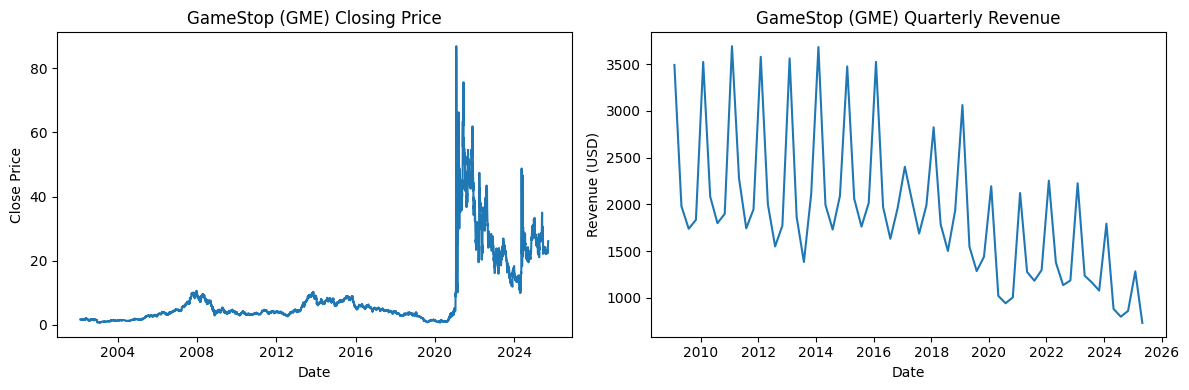

In [39]:
plot_stock_and_revenue(gamestop_stock, gamestop_revenue, "GameStop (GME)")